In [106]:
ENV["JULIA_PKG_SERVER"] = ""
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [107]:
rng = Random.default_rng()

type="ColTable"
num_rows = 300
num_features = 5
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; class_probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; class_probs, type, rng=42)

((Column1 = [0.564, 0.862, 0.793, 0.505, 1.213, 0.683, 0.699, 0.387, 0.334, 0.545  …  0.668, 0.576, 1.224, 0.817, 0.288, 1.269, 0.511, 0.612, 0.471, 0.653], Column2 = [0.927, 0.5, 0.484, 0.869, 1.338, 0.606, 0.717, 1.501, 1.55, 0.763  …  0.63, 0.325, 1.81, 0.558, 1.3, 1.649, 1.548, 0.988, 0.651, 0.555], Column3 = [0.633, 0.744, 0.672, 0.65, 0.575, 0.74, 0.609, 0.005, 0.055, 0.741  …  0.724, 0.654, 0.767, 0.708, 0.035, 0.155, 0.027, 0.634, 0.579, 0.672], Column4 = [0.125, 0.17, 0.217, 0.154, 0.222, 0.206, 0.264, 0.663, 0.663, 0.107  …  0.223, 0.318, 0.204, 0.254, 0.634, 0.31, 0.599, 0.175, 0.123, 0.08], Column5 = [0.49, 0.504, 0.829, 0.798, 1.454, 0.009, 0.514, 0.087, -0.034, -0.021  …  0.658, 0.089, 1.425, 0.478, -0.01, 1.456, 0.009, 0.067, -0.19, 1.059]), CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 1, 0, 0, 2, 2, 0  …  0, 0, 1, 0, 2, 1, 2, 0, 0, 0])

### 2. Apply Random Undersampler

#### Using Imbalance Only

In [108]:
X_under, y_under = random_undersample(X, y; ratios = Dict(0=>1.0, 1=> 1.0, 2=>0.9), rng = 42)

((Column1 = [0.564, 0.793, 0.683, 0.699, 0.545, 0.813, 0.612, 0.793, 0.737, 0.452  …  0.07, 0.249, 0.414, 0.142, 0.234, 0.169, 0.038, 0.428, 0.721, 0.107], Column2 = [0.927, 0.484, 0.606, 0.717, 0.763, 0.395, 0.459, 0.266, 0.846, 0.141  …  1.434, 1.577, 1.662, 1.498, 1.561, 1.609, 1.758, 1.577, 1.677, 1.518], Column3 = [0.633, 0.672, 0.74, 0.609, 0.741, 0.757, 0.634, 0.75, 0.705, 0.749  …  0.047, 0.019, 0.014, 0.021, 0.047, 0.024, 0.053, 0.019, 0.078, 0.021], Column4 = [0.125, 0.217, 0.206, 0.264, 0.107, 0.121, 0.08, 0.192, 0.156, 0.192  …  0.911, 0.84, 0.843, 0.974, 0.963, 0.79, 0.744, 0.926, 0.834, 0.796], Column5 = [0.49, 0.829, 0.009, 0.514, -0.021, 0.218, 0.793, 0.324, 0.769, 0.283  …  0.041, 0.098, -0.042, 0.052, 0.106, 0.084, -0.015, 0.062, 0.047, 0.187]), CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Using MLJ

In [109]:
naive_model = Imbalance.MLJ.RandomUndersampler(ratios=Dict(0=>1.0, 1=> 1.0, 2=>0.9), rng=42)
mach = machine(naive_model)
X_under, y_under = transform(mach, X, y)

((Column1 = [0.564, 0.793, 0.683, 0.699, 0.545, 0.813, 0.612, 0.793, 0.737, 0.452  …  0.07, 0.249, 0.414, 0.142, 0.234, 0.169, 0.038, 0.428, 0.721, 0.107], Column2 = [0.927, 0.484, 0.606, 0.717, 0.763, 0.395, 0.459, 0.266, 0.846, 0.141  …  1.434, 1.577, 1.662, 1.498, 1.561, 1.609, 1.758, 1.577, 1.677, 1.518], Column3 = [0.633, 0.672, 0.74, 0.609, 0.741, 0.757, 0.634, 0.75, 0.705, 0.749  …  0.047, 0.019, 0.014, 0.021, 0.047, 0.024, 0.053, 0.019, 0.078, 0.021], Column4 = [0.125, 0.217, 0.206, 0.264, 0.107, 0.121, 0.08, 0.192, 0.156, 0.192  …  0.911, 0.84, 0.843, 0.974, 0.963, 0.79, 0.744, 0.926, 0.834, 0.796], Column5 = [0.49, 0.829, 0.009, 0.514, -0.021, 0.218, 0.793, 0.324, 0.769, 0.283  …  0.041, 0.098, -0.042, 0.052, 0.106, 0.084, -0.015, 0.062, 0.047, 0.187]), CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Using TableTransforms

In [110]:
using Imbalance: TableTransforms.RandomUndersampler
naive_model_t = RandomUndersampler(y_ind, ratios=Dict(0=>1.0, 1=> 0.9, 2=>1.0), rng=42)
Xyover = Xy |> naive_model_t

(Column1 = [0.564, 0.793, 0.683, 0.699, 0.545, 0.813, 0.612, 0.793, 0.737, 0.452  …  0.249, 0.414, 0.142, 0.169, 0.038, 0.311, 0.428, 0.28, 0.288, 0.511],
 Column2 = [0.927, 0.484, 0.606, 0.717, 0.763, 0.395, 0.459, 0.266, 0.846, 0.141  …  1.577, 1.662, 1.498, 1.609, 1.758, 1.725, 1.577, 1.509, 1.3, 1.548],
 Column3 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 Column4 = [0.633, 0.672, 0.74, 0.609, 0.741, 0.757, 0.634, 0.75, 0.705, 0.749  …  0.019, 0.014, 0.021, 0.024, 0.053, 0.035, 0.019, 0.022, 0.035, 0.027],
 Column5 = [0.125, 0.217, 0.206, 0.264, 0.107, 0.121, 0.08, 0.192, 0.156, 0.192  …  0.84, 0.843, 0.974, 0.79, 0.744, 0.672, 0.926, 0.797, 0.634, 0.599],
 Column6 = [0.49, 0.829, 0.009, 0.514, -0.021, 0.218, 0.793, 0.324, 0.769, 0.283  …  0.098, -0.042, 0.052, 0.084, -0.015, 0.062, 0.062, 0.109, -0.01, 0.009],)

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


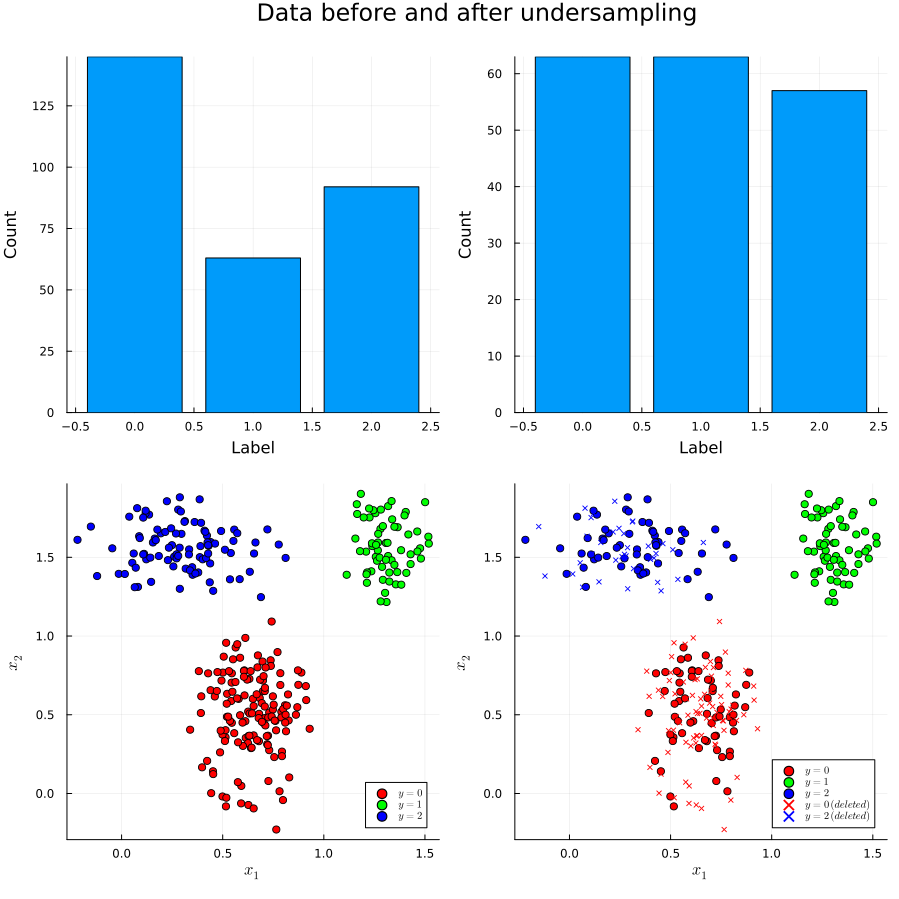

In [111]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, y_under, X, X_under; show_deleted=true)

Plots.AnimatedGif("/Users/essam/Documents/GitHub/Imbalance.jl/examples/assets/random_undersample.gif")
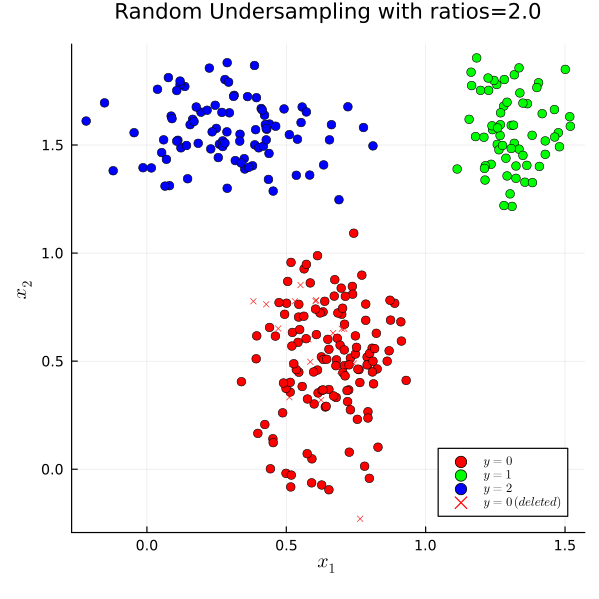

In [112]:
import Logging
Logging.disable_logging(Logging.Warn)

anim = @animate for ratios ∈ 2.0:-0.05:0.1
	X_under, y_under = random_undersample(X, y; ratios = ratios, rng = 42)
	plot_data(y, y_under, X, X_under; single_plot=true, 
			  single_plot_title="Random Undersampling with ratios=$ratios")
end
gif(anim, "./assets/random_undersample.gif", fps=3)